In [1]:
from keras.datasets import mnist

In [2]:
(train_feature, train_label), (test_feature, test_label) = mnist.load_data()

In [3]:
print(len(train_feature))

60000


In [4]:
print(train_feature.shape, train_label.shape)

(60000, 28, 28) (60000,)


In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
def show_image(image):
  fig = plt.gcf()
  fig.set_size_inches(2, 2)
  plt.imshow(image, cmap='binary')
  plt.show()

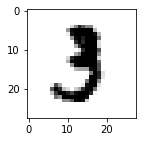

3


In [7]:
show_image(train_feature[10])
print(train_label[10])

In [8]:
def show_images_labels_predictions(images, labels, predictions, start_id, num=10):
  plt.gcf().set_size_inches(12, 14)
  if num > 25: num = 25
  for i in range(0, num):
    ax = plt.subplot(5, 5, i+1)
    ax.imshow(images[start_id], cmap='binary')
      
    if len(predictions) > 0:
        title = 'ai = ' + str(predictions[start_id])
        title += (' (o)' if predictions[start_id] == labels[start_id] else ' (x)')
        title += '\nlabel = ' + str(labels[start_id])
    else:
        title = 'label = ' + str(labels[start_id])
          
    ax.set_title(title, fontsize = 12)
    ax.set_xticks([])
    ax.set_yticks([])
    start_id += 1
  plt.show()

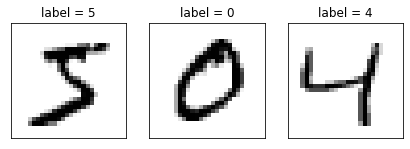

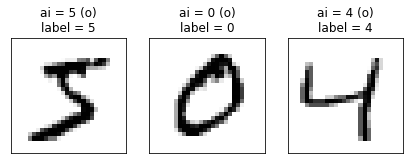

In [9]:
show_images_labels_predictions(train_feature, train_label, [], 0, 3)
show_images_labels_predictions(train_feature, train_label, [5,0,4], 0, 3)

In [10]:
train_feature_vector = train_feature.reshape(len(train_feature),784).astype('float32')
test_feature_vector = test_feature.reshape(len(test_feature),784).astype('float32')
print(train_feature_vector.shape)

(60000, 784)


In [11]:
train_feature_normalize = train_feature_vector/255
test_feature_normalize = test_feature_vector/255

In [12]:
from keras.utils import np_utils
train_label_onehot = np_utils.to_categorical(train_label)
test_label_onehot = np_utils.to_categorical(test_label)
print(train_label[0])
print(train_label_onehot[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [13]:
from keras.models import Sequential
from keras.layers import Dense

In [14]:
model = Sequential()
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))
model.add(Dense(units=10, kernel_initializer='normal', activation='softmax'))
print(model.summary())

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


In [15]:
train_history = model.fit(
    x=train_feature_normalize,
    y=train_label_onehot,
    validation_split=0.2,
    epochs=10,
    batch_size=200,
    verbose=1
)

Epoch 1/10
240/240 [==============================] - 1s 3ms/step - loss: 0.0194 - accuracy: 0.8766 - val_loss: 0.0102 - val_accuracy: 0.9340
Epoch 2/10
240/240 [==============================] - 1s 3ms/step - loss: 0.0090 - accuracy: 0.9440 - val_loss: 0.0074 - val_accuracy: 0.9542
Epoch 3/10
240/240 [==============================] - 1s 3ms/step - loss: 0.0067 - accuracy: 0.9586 - val_loss: 0.0063 - val_accuracy: 0.9610
Epoch 4/10
240/240 [==============================] - 1s 3ms/step - loss: 0.0052 - accuracy: 0.9689 - val_loss: 0.0054 - val_accuracy: 0.9658
Epoch 5/10
240/240 [==============================] - 1s 3ms/step - loss: 0.0042 - accuracy: 0.9748 - val_loss: 0.0049 - val_accuracy: 0.9697
Epoch 6/10
240/240 [==============================] - 1s 3ms/step - loss: 0.0035 - accuracy: 0.9801 - val_loss: 0.0044 - val_accuracy: 0.9718
Epoch 7/10
240/240 [==============================] - 1s 2ms/step - loss: 0.0029 - accuracy: 0.9835 - val_loss: 0.0043 - val_accuracy: 0.9713
Epoch 

In [16]:
scores = model.evaluate(test_feature_normalize, test_label_onehot)
print(f'準確率 = {scores[1]}')

313/313 [==============================] - 0s 848us/step - loss: 0.0035 - accuracy: 0.9776
準確率 = 0.9775999784469604


In [17]:
prediction = model.predict_classes(test_feature_normalize)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


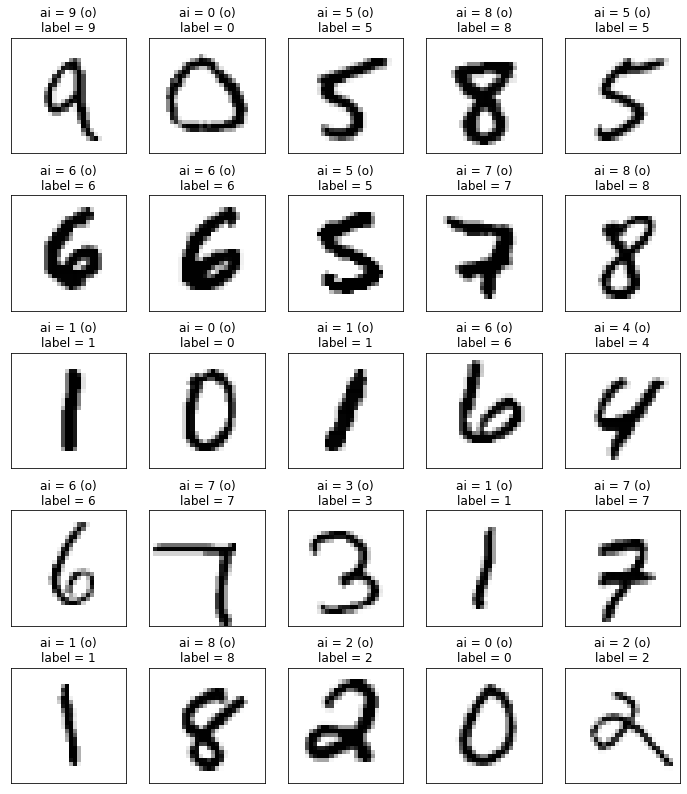

In [18]:
show_images_labels_predictions(test_feature, test_label, prediction, 125, 25)

In [19]:
import pandas as pd
print('\t[Info] Display Confusion Matrix:')
print("%s\n" % pd.crosstab(test_label, prediction, rownames=['label'], colnames=['predict']))

	[Info] Display Confusion Matrix:
predict    0     1     2    3    4    5    6     7    8    9
label                                                       
0        972     0     2    1    1    1    0     1    2    0
1          0  1117     4    1    0    1    4     1    7    0
2          5     1  1012    1    1    0    1     5    6    0
3          0     0     6  992    0    3    0     3    4    2
4          2     0     6    0  966    0    2     1    1    4
5          2     0     0   10    1  870    3     1    4    1
6          6     2     3    1    4    8  931     0    3    0
7          0     3     8    4    0    1    0  1002    3    7
8          2     0     3   11    3    4    1     3  946    1
9          4     5     1   11    9    4    0     5    2  968



In [20]:
#from google.colab import drive
#drive.mount('/content/gdrive')

In [21]:
# jupyter notebook
model.save('./Mnist_mlp_model.h5')

In [22]:
# google colab
#model.save('/content/gdrive/My Drive/AIoT_NTUST/Mnist_mlp_model.h5')